In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tt
from sklearn import preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\Sales\train.csv")
df.drop_duplicates(inplace = True)
df = df.drop('id',axis = 1)
df.reset_index(drop = True)
df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [4]:
df.describe()

,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00
std,1.558579e+01,1.101998e+03,1.221888e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02


In [5]:
df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())

date
['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
store_nbr
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
family
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
sales
[0.000000e+00 2.000000e+00 8.100000e+02 ... 4.381330e+02 1.545530e+02
 2.419729e+03]
onpromotion
[  0   3   5   1  56  20  19   2   4  18  17  12   6   7  10   9  50   8
  16  42  51  13  15  47  21  40  37  54  24  58  22  59  11  45  25  55
  26  43  35  14

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.isocalendar().day
df.head()

,date,store_nbr,family,sales,onpromotion,month,year,day
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,2013,2
1,2013-01-01,1,BABY CARE,0.0,0,1,2013,2
2,2013-01-01,1,BEAUTY,0.0,0,1,2013,2
3,2013-01-01,1,BEVERAGES,0.0,0,1,2013,2
4,2013-01-01,1,BOOKS,0.0,0,1,2013,2


In [8]:
label_encoder = preprocessing.LabelEncoder()

df['family']= label_encoder.fit_transform(df['family']) 
df.head()

,date,store_nbr,family,sales,onpromotion,month,year,day
0,2013-01-01,1,0,0.0,0,1,2013,2
1,2013-01-01,1,1,0.0,0,1,2013,2
2,2013-01-01,1,2,0.0,0,1,2013,2
3,2013-01-01,1,3,0.0,0,1,2013,2
4,2013-01-01,1,4,0.0,0,1,2013,2


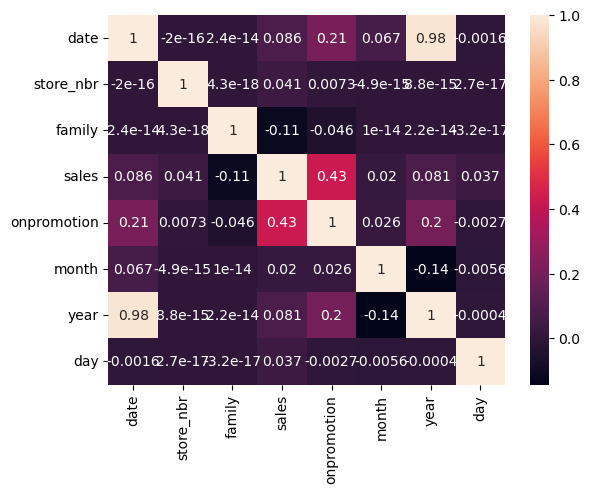

In [9]:
sns.heatmap(df.corr(),annot = True)
plt.show()

It it clear that sales has a direct relation with promotion and neagtively with family and somewhat depended on date and year

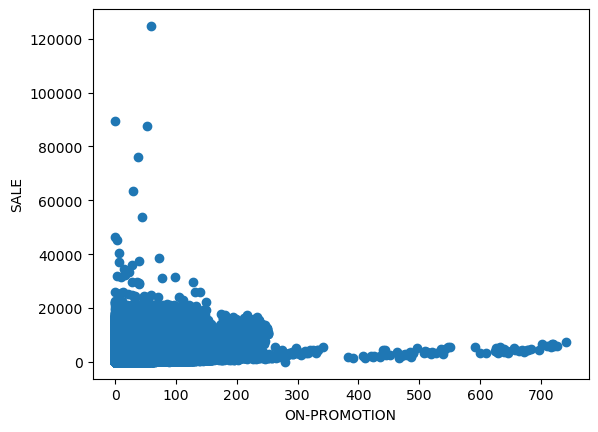

In [10]:
plt.scatter(df['onpromotion'],df['sales'])
plt.xlabel('ON-PROMOTION')
plt.ylabel('SALE')
plt.show()

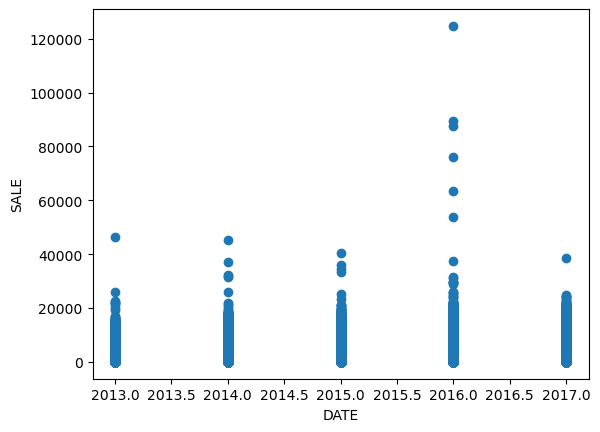

In [11]:
plt.scatter(df['year'],df['sales'])
plt.xlabel('DATE')
plt.ylabel('SALE')
plt.show()

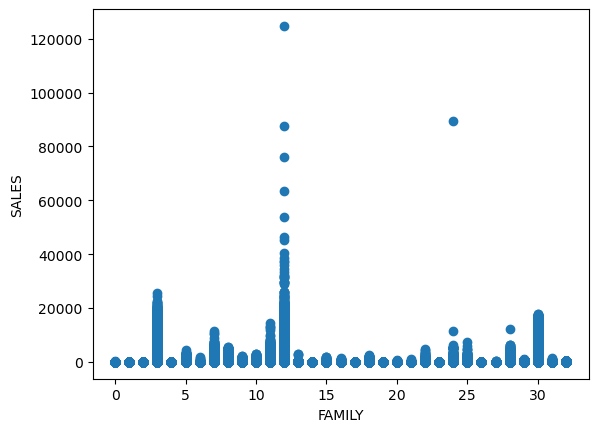

In [12]:
plt.scatter(df['family'],df['sales'])
plt.xlabel('FAMILY')
plt.ylabel('SALES')
plt.show()

In [13]:
X = df.drop(['sales','date','month','day'],axis = 1)
y = df['sales']

In [14]:
x_train,x_test,y_train,y_test = tt(X,y,random_state = 42)
model = LinearRegression()
algo1 = model.fit(x_train,y_train)

y_pred = algo1.predict(x_test)

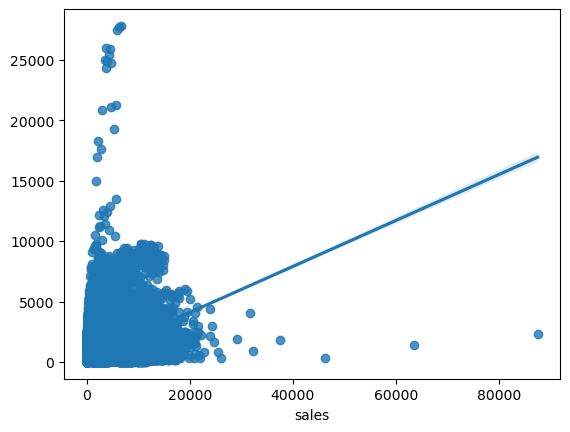

In [15]:
sns.regplot(x = y_test, y = y_pred)
plt.show()

In [16]:
print(algo1.score(x_test,y_test))

0.1921851224437071
